In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import mpld3
import random
mpld3.enable_notebook()

In [2]:
avg_cons = 23260  #Average consumption of gas in kWh for a family of 2 parents and 1 child

In [3]:
df = pandas.read_csv("gas_vreg.csv")
df = df.drop(['year','Month','Day','h','From','To'], 1)
df['cons_kWh_ref'] = df.apply(lambda row: row['Cons_percentage']*avg_cons, axis=1)

In [4]:
split_fam = df
i = 1
while i <= 5:
    
    df['cons_kWh_fam'+str(i)] = df.apply(lambda row: row['Cons_percentage']*avg_cons*(0.9+0.2*random.random()), axis=1)
    i += 1
split_fam.head()


UTC  Cons_percentage  cons_kWh_ref  cons_kWh_fam1  cons_kWh_fam2  \
0  1/1/2017 5:00         0.000241      5.600661       5.772984       5.306470   
1  1/1/2017 6:00         0.000321      7.468272       7.710174       7.782866   
2  1/1/2017 7:00         0.000375      8.721935       8.147952       9.442413   
3  1/1/2017 8:00         0.000369      8.577332       9.215653       8.009611   
4  1/1/2017 9:00         0.000342      7.948698       7.895945       8.332848   

   cons_kWh_fam3  cons_kWh_fam4  cons_kWh_fam5  
0       5.861108       6.016043       5.430994  
1       7.429412       6.952196       7.898818  
2       8.697965       8.547253       9.075726  
3       7.870765       7.752212       8.518926  
4       7.619011       8.350744       8.236862

In [6]:
df['combined_kWh']= df.apply(lambda row: row['cons_kWh_fam1'] + row['cons_kWh_fam2'] + row['cons_kWh_fam3'] + row['cons_kWh_fam4'] + row['cons_kWh_fam5'], axis=1)

               UTC  Cons_percentage  cons_kWh_ref  cons_kWh_fam1  \
0  12/30/2017 7:00         0.000390      9.067704       9.955838   
1   1/28/2017 7:00         0.000380      8.830182       9.615248   
2   1/21/2017 7:00         0.000386      8.973080       9.187710   
3    1/7/2017 7:00         0.000392      9.115868       8.548645   
4  12/23/2017 7:00         0.000384      8.927811       8.228810   

   cons_kWh_fam2  cons_kWh_fam3  cons_kWh_fam4  cons_kWh_fam5  combined_kWh  
0       9.373810       9.924780       8.777350       8.405116     46.436892  
1       9.051853       8.519279       9.561495       9.547001     46.294876  
2       9.574745       9.026314       9.392277       8.294715     45.475760  
3       9.945970       8.538085       9.168397       8.963034     45.164130  
4       9.230019       8.477370       9.367787       9.361572     44.665558  


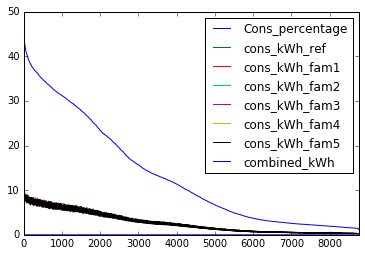

In [9]:
time_data_sorted = df.sort_values('combined_kWh', ascending=False)
index = 0
sorted_frame = time_data_sorted.reset_index(drop=True)
print sorted_frame.head()
sorted_frame.plot()

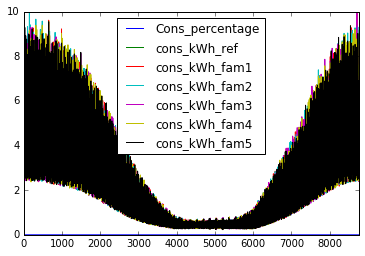

In [5]:
split_fam.plot()